In [1]:
!nvidia-smi

Wed May 18 20:38:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P3    11W /  N/A |    911MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#conda install -c conda-forge tensorflow

In [3]:
#import tensorflow as tf

In [4]:
#conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

plt.style.use('fivethirtyeight')

In [6]:
# Lambda function of activation function
#activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0, 1, 0)

Activation function in 'trafitional' ways:

```python
def activationFunction(inputs, weights):
    z = np.dot(inputs, weights)
    y_hat = np.where(z > 0, 1, 0)
    return y_hat

def actitivationFunction(inputs, weights):
    z = np.dot(inputs, weights)
    if z > 0:
        y_hat = 1
    else:
        y_hat = 0
   return y_hat
```

In [32]:
class Perceptron:
    def __init__(self, eta, epochs):
        self.weights = np.random.randn(3) * 1e-4
        print(f'self.weights: {self.weights}')
        self.eta = eta
        self.epochs = epochs
        
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)
        return np.where(z > 0, 1, 0)

    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, - np.ones((len(self.X), 1))] # concatination of -1 bias
        print(f'X_with_bias: \n{X_with_bias}')
        
        for epoch in range(self.epochs):
            print(f'for epoch: {epoch}')
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print(f'predicted value: \n{y_hat}')
            error = self.y - y_hat
            print(f'error: \n{error}')
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f'updated weights: \n{self.weights}')
            print('###########\n')
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))] #concatination of -1 bias 
        return self.activationFunction(X_with_bias, self.weights)

Sample dataset creation

In [33]:
data = {'x1': [0,0,1,1], 'x2': [0,1,0,1], 'y':[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


Splitting the dataset (X,y)

In [34]:
X = AND.drop('y', axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [35]:
y = AND.y
y.to_frame() # to frame to respresnt as df, not as a series

,y
0,0
1,0
2,0
3,1


Calling for a model, fitting, predicting

In [36]:
model = Perceptron(eta=0.01, epochs=10)

self.weights: [ 1.02384779e-04 -2.85758381e-06 -7.56166795e-06]


In [37]:
model.fit(X, y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-0.00989762 -0.01000286  0.02999244]
###########

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 1.02384779e-04 -2.85758381e-06  1.99924383e-02]
###########

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.01010238 0.00999714 0.00999244]
###########

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[ 1.02384779e-04 -2.85758381e-06  2.99924383e-02]
###########

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.01010238 0.00999714 0.01999244]
###########

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2   

In [38]:
model.predict(X)

array([0, 0, 0, 1])

Save and load model

In [39]:
import os
# Saving model
dir_ = 'model' 
os.makedirs(dir_, exist_ok=True) 
filename = os.path.join(dir_, 'AND_model.model')  
joblib.dump(model, filename)

['model\\AND_model.model']

In [ ]:
# Loading model
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

Other dataset, modeling

In [40]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [41]:
X = OR.drop('y', axis=1)
y = OR.y

In [44]:
model = Perceptron(eta=0.5, epochs=10)
model.fit(X,y)
model.predict(X)

self.weights: [-2.58596775e-05 -5.33471266e-05 -7.03222154e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 0]
error: 
0   -1
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 4.99974140e-01  4.99946653e-01 -7.03222154e-05]
###########

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49997414 0.49994665 0.49992968]
###########

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49997414 0.49994665 0.49992968]
###########

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49997414 0.49994665 0.49992968]
###########

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49997414 0.49994665 0.49992968]
###########

for epoch: 5
predicte

array([0, 1, 1, 1])

Another sample dataset

In [45]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [46]:
X = XOR.drop('y', axis=1)
y = XOR.y

In [48]:
model = Perceptron(eta=0.5, epochs=50)
model.fit(X,y)
model.predict(X)

self.weights: [ 7.23493521e-05 -6.41994533e-05  5.99967480e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 1 0]
error: 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 7.23493521e-05  4.99935801e-01 -4.99940003e-01]
###########

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99927651e-01 -6.41994533e-05  5.00059997e-01]
###########

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 7.23493521e-05  4.99935801e-01 -4.99940003e-01]
###########

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99927651e-01 -6.41994533e-05  5.00059997e-01]
###########

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 7.23493521e-05  4.9993

array([0, 0, 0, 0])

### Graphical analysis

#### AND GATE

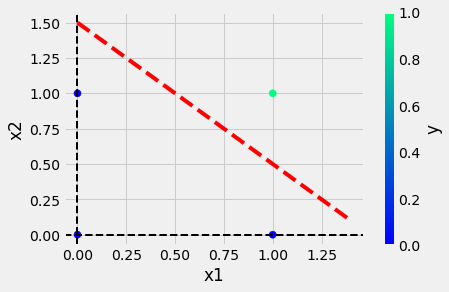

In [49]:
AND.plot(kind='scatter', x='x1', y='x2', c='y', s=50, cmap='winter')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)

plt.plot(np.linspace(0, 1.4), 1.5 - 1*np.linspace(0, 1.4), 'r--')

#### OR GATE

<AxesSubplot:xlabel='x1', ylabel='x2'>

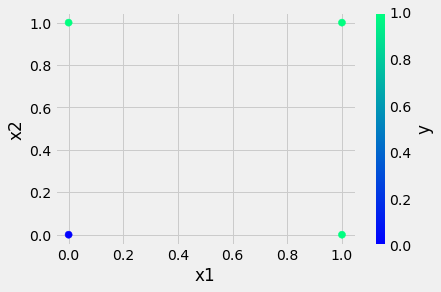

In [50]:
OR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, cmap='winter')

#### XOR GATE

<AxesSubplot:xlabel='x1', ylabel='x2'>

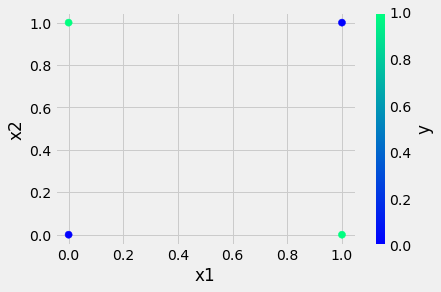

In [51]:
XOR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, cmap='winter')

> We are not getting no error predictions with one Perceptron in case of non linear datasets. Like in XOR dataset. Perceptron couldn't classsify the dataset correctly even in 50 epochs. 

**Solution?** 
    > In the XOR dataset we should use Neuron, because we're dealing with non linear problem.